<a href="https://colab.research.google.com/github/EDWINYAPZ/capital-management-/blob/main/capital_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kelly criterion in a binomial setting

In [ ]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import mpl, plt

In [ ]:
np.random.seed(1000)
plt.style.use("seaborn")
mpl.rcParams["font.family"] = "serif"
%matplotlib inline

<ipython-input-43-ac15e0a39eb0>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
p = 0.55

In [ ]:
f = p - (1 - p)

In [ ]:
f

0.10000000000000009

In [ ]:
I = 50
# takes50 series of 100 series

In [ ]:
n = 100

In [ ]:
def run_simulation(f):
  c = np.zeros((n, I))
  c[0] = 100
  for i in range(I):
    for t in range(1, n):
      o = np.random.binomial(1, p)
      if o > 0:
          c [t, i] = (1 + f) * c[t - 1, i]
      else:
          c[t, i] = (1 - f) * c[t - 1, i]
  return c

In [ ]:
c_1 = run_simulation(f)

In [ ]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [ 99.  , 121.  ,  99.  , ..., 121.  ,  81.  , 121.  ],
       ...,
       [226.35, 338.13, 413.27, ..., 123.97, 123.97, 123.97],
       [248.99, 371.94, 454.6 , ..., 136.37, 136.37, 136.37],
       [273.89, 409.14, 409.14, ..., 122.73, 150.01, 122.73]])

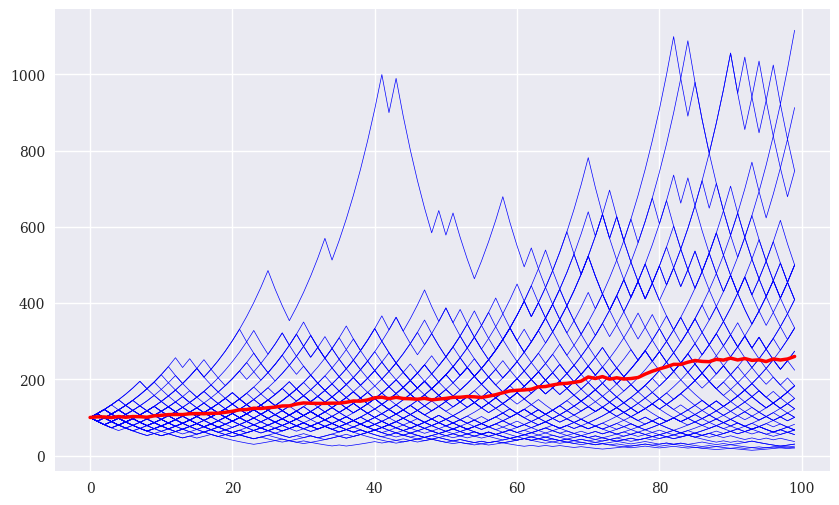

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(c_1, "b", lw=0.5)
plt.plot(c_1.mean(axis=1), "r", lw=2.5);
#plt.savefig("../../images/ch16/auto_plot_01.png");

In [ ]:
c_2 = run_simulation(0.05)


In [ ]:
c_3 = run_simulation(0.25)

In [ ]:
c_4 = run_simulation(0.5)

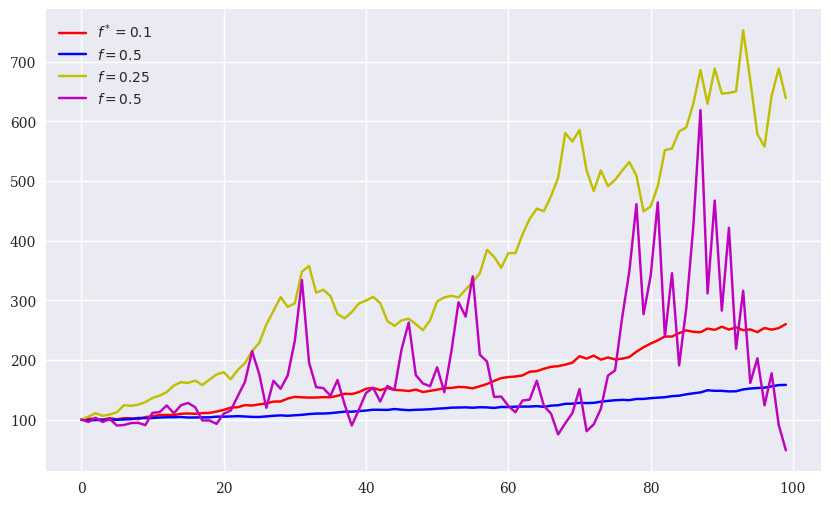

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), "r", label="$f^*=0.1$")
plt.plot(c_2.mean(axis=1), "b", label="$f=0.5$")
plt.plot(c_3.mean(axis=1), "y", label="$f=0.25$")
plt.plot(c_4.mean(axis=1), "m", label="$f=0.5$")
plt.legend(loc=0);
#plt.savefig("../../images/ch16/auto_plot_02.png");

## `kelly criterio for stocks and indices`

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tr_eikon_eod_data (2).csv to tr_eikon_eod_data (2).csv


In [ ]:
raw =  pd.read_csv("tr_eikon_eod_data (2).csv",
                   index_col=0, parse_dates=True)

In [ ]:
symbol = ".SPX"

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data["returns"] = np.log(data) / data.shift(1)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2061 entries, 2010-01-05 to 2018-06-29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   .SPX     2061 non-null   float64
 1   returns  2061 non-null   float64
dtypes: float64(2)
memory usage: 48.3 KB


In [ ]:
data.head()

,.SPX,returns
Date,,
2010-01-05,1136.52,0.006210
2010-01-06,1137.14,0.006191
2010-01-07,1141.69,0.006191
2010-01-08,1144.98,0.006169
2010-01-11,1146.98,0.006153


In [ ]:
data.tail()

,.SPX,returns
Date,,
2018-06-25,2717.07,0.002870
2018-06-26,2723.06,0.002911
2018-06-27,2699.63,0.002901
2018-06-28,2716.31,0.002929
2018-06-29,2718.37,0.002911


In [ ]:
data.describe().round(2)

,.SPX,returns
count,2061.00,2061.00
mean,1802.78,0.00
std,483.35,0.00
min,1022.58,0.00
25%,1338.35,0.00
50%,1863.40,0.00
75%,2109.60,0.01
max,2872.87,0.01


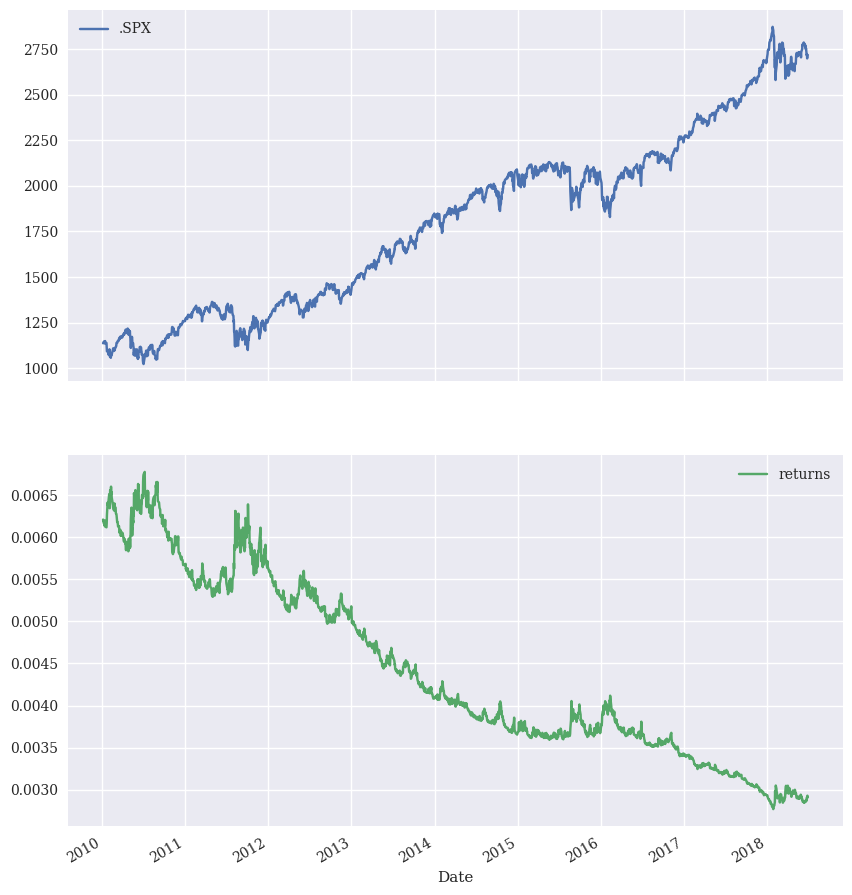

In [ ]:
data.plot(figsize=(10, 12),subplots=True);
#all above is preprocessing

In [ ]:
mu = data.returns.mean() * 252
#its calculates anuualise return

In [ ]:
mu


1.1131491124998496

In [ ]:
sigma = data.returns.std() * 252 ** 0.5
#its calculate anualised volatise

In [ ]:
sigma

0.016860867895624986

In [ ]:
r = 0.0
#risk free rate

In [ ]:
f = (mu - r) / sigma ** 2

In [ ]:
f

3915.5564809961234

In [ ]:
equs = []

In [ ]:
def kelly_strategy(f):
    global equs
    equ = "equity_{:.2f}".format(f)
    equs.append(equ)
    cap = "capital_{:.2f}".format(f)
    data[equ] = 1 #set new columns for equit
    data[cap] = data[equ] * f #generate another colums for capital
    for i, t in enumerate(data.index[1:]):
      t_1 = data.index[i]
      data.loc[t, cap] = data[cap].loc[t_1] * \
                          math.exp(data["returns"].loc[t])
      data.loc[t, equ] = data[cap].loc[t] - \
                          data[cap].loc[t_1] + \
                          data[cap].loc[t_1]
      data.loc[t, cap] = data[equ].loc[t] * f

In [ ]:
kelly_strategy(f * 0.5)

<ipython-input-139-3bab3b250775>:15: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-139-3bab3b250775>:12: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
kelly_strategy( f * 0.66)

<ipython-input-139-3bab3b250775>:15: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-139-3bab3b250775>:12: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
kelly_strategy(f)

<ipython-input-139-3bab3b250775>:15: RuntimeWarning:

overflow encountered in double_scalars

<ipython-input-139-3bab3b250775>:12: RuntimeWarning:

invalid value encountered in double_scalars



In [ ]:
print(data[equs].tail())

            equity_1957.78  equity_2584.27  equity_3915.56
Date                                                      
2018-06-25             NaN             NaN             NaN
2018-06-26             NaN             NaN             NaN
2018-06-27             NaN             NaN             NaN
2018-06-28             NaN             NaN             NaN
2018-06-29             NaN             NaN             NaN


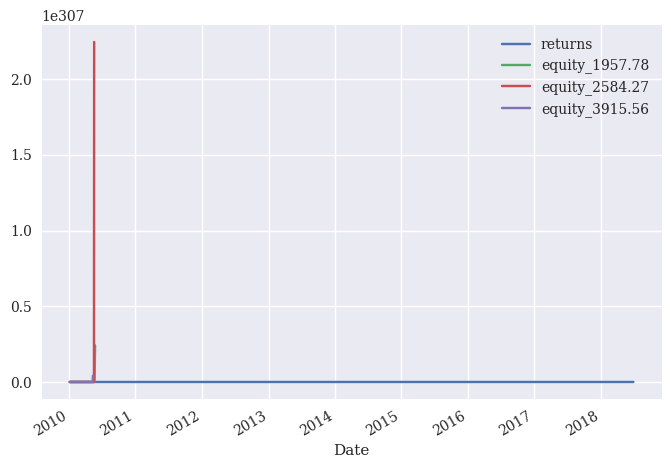

In [ ]:
ax = data["returns"].cumsum().apply(np.exp).plot(legend=True)
data[equs].plot(ax=ax, legend=True);
